# MSDS 422 - Practical Machine Learning - Week 5 - Assignment

##### Author: Jason De Melo - 2/7/2022

### Research Question
#### What is the likelyhood of a company filing for bankruptcy?

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Load Data / Data Quality Review

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


The data is all numeric. But, it seems it needs to be scaled.

Check on missing/invalid data

In [5]:
pd.isnull(data).values.any()

False

In [6]:
pd.isna(data).values.any()

False

No missing or invalid data, which is good.

#### Exploratory Data Analysis (EDA)

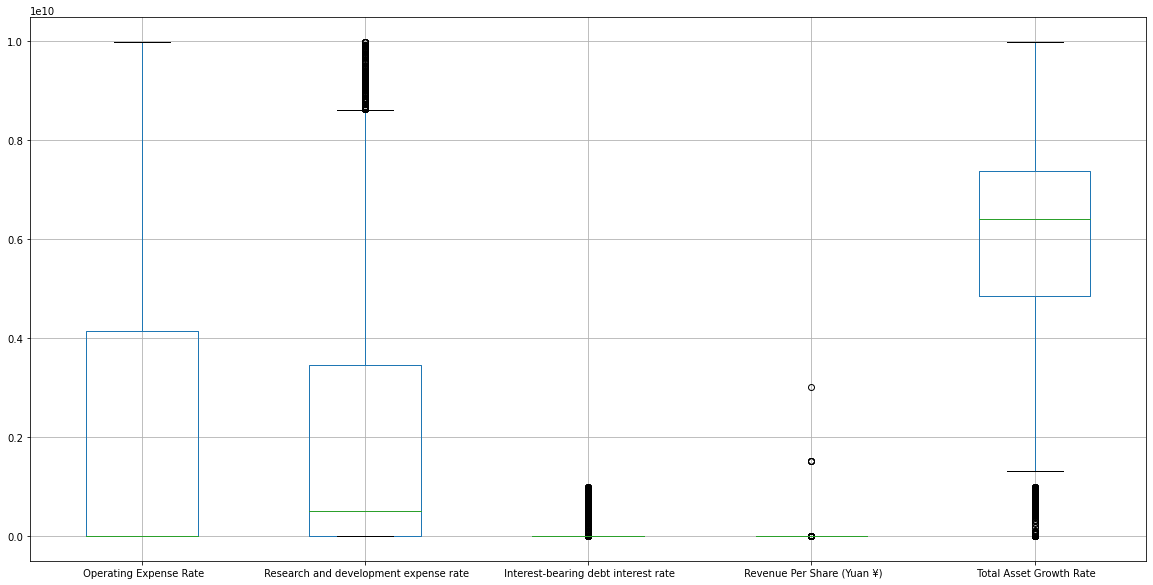

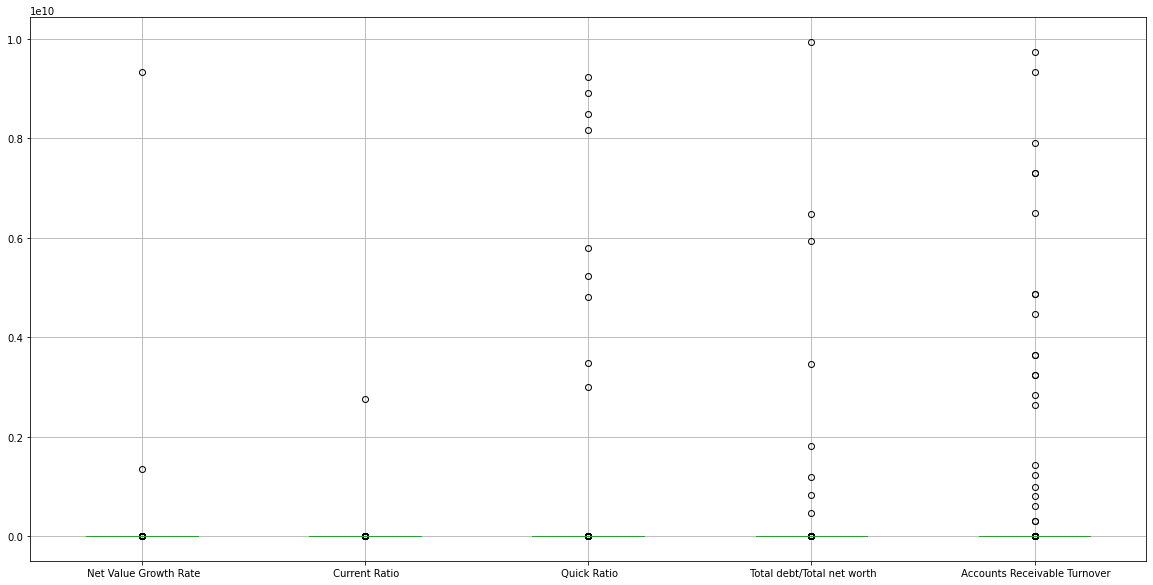

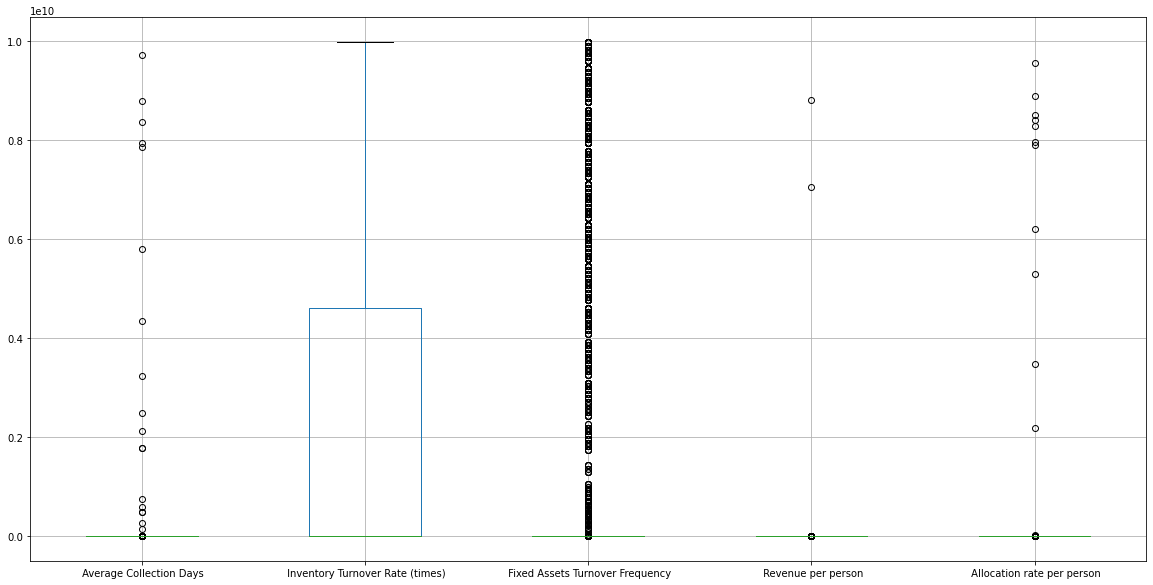

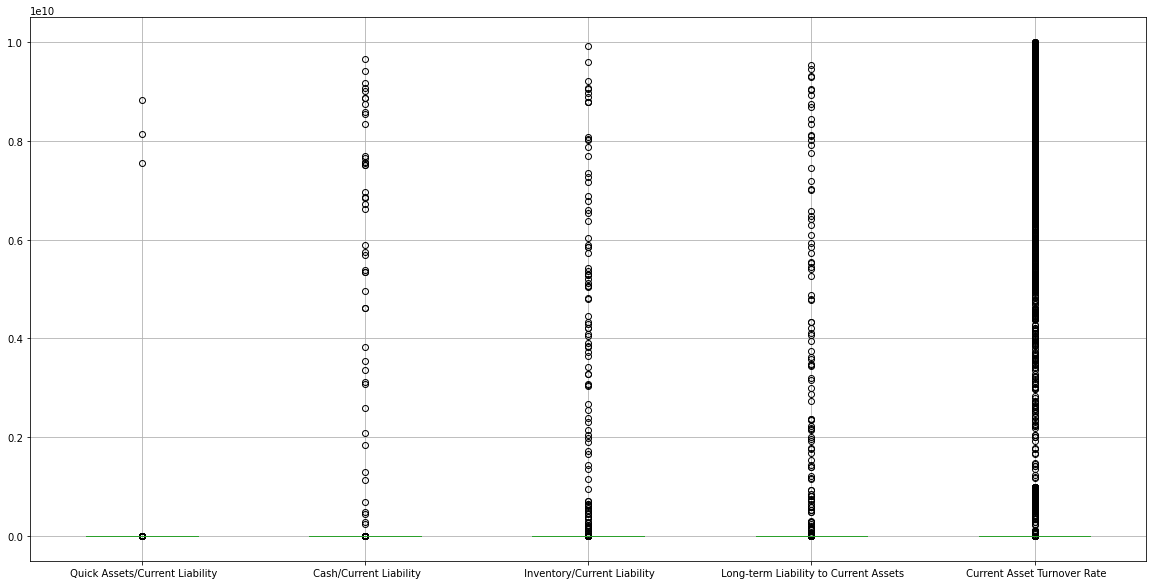

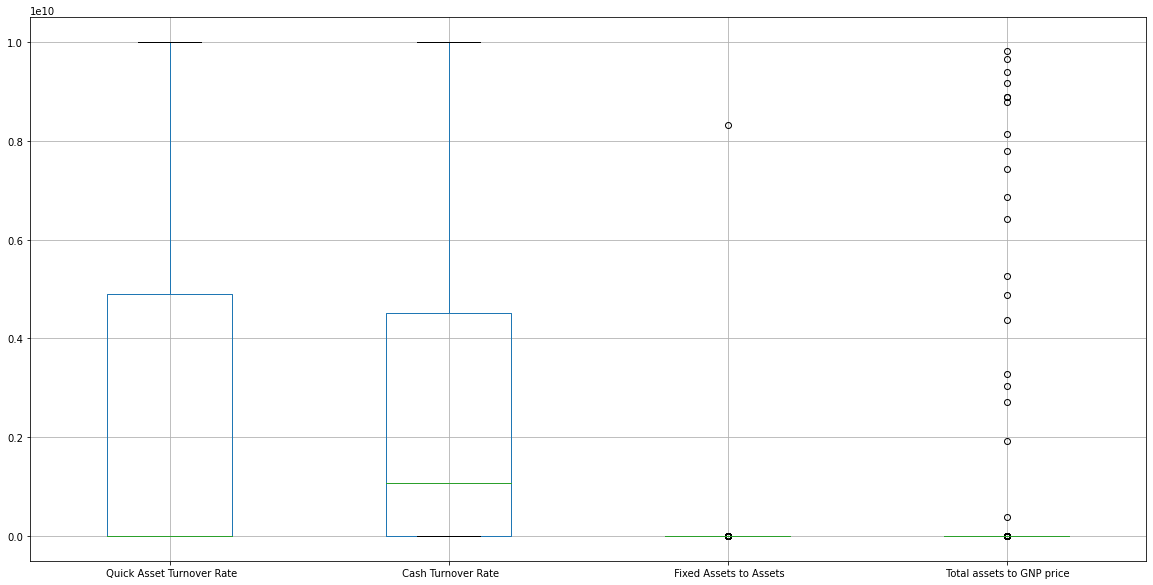

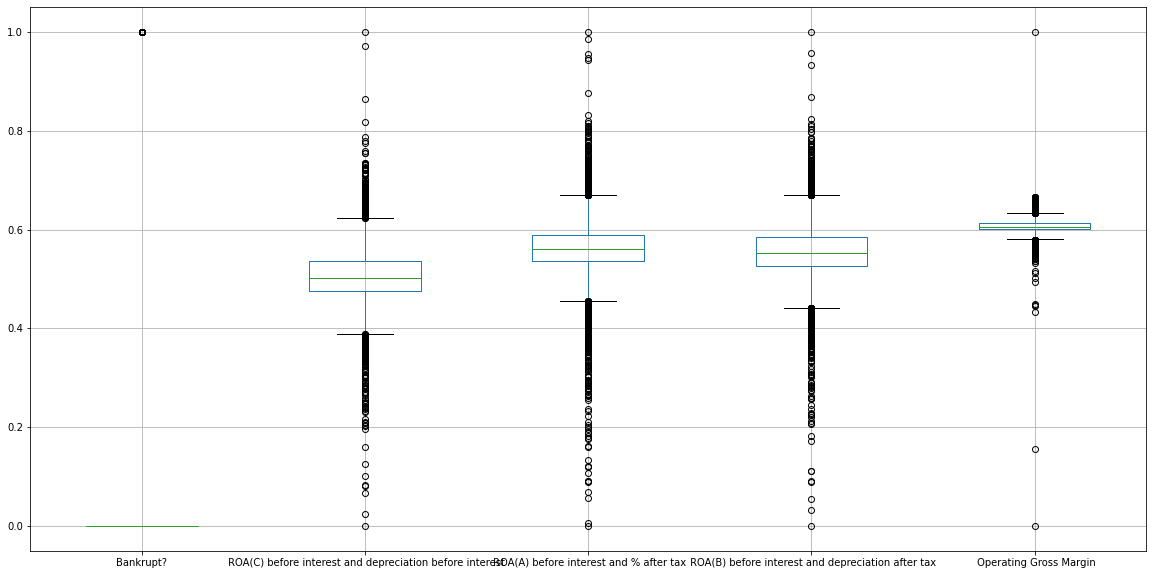

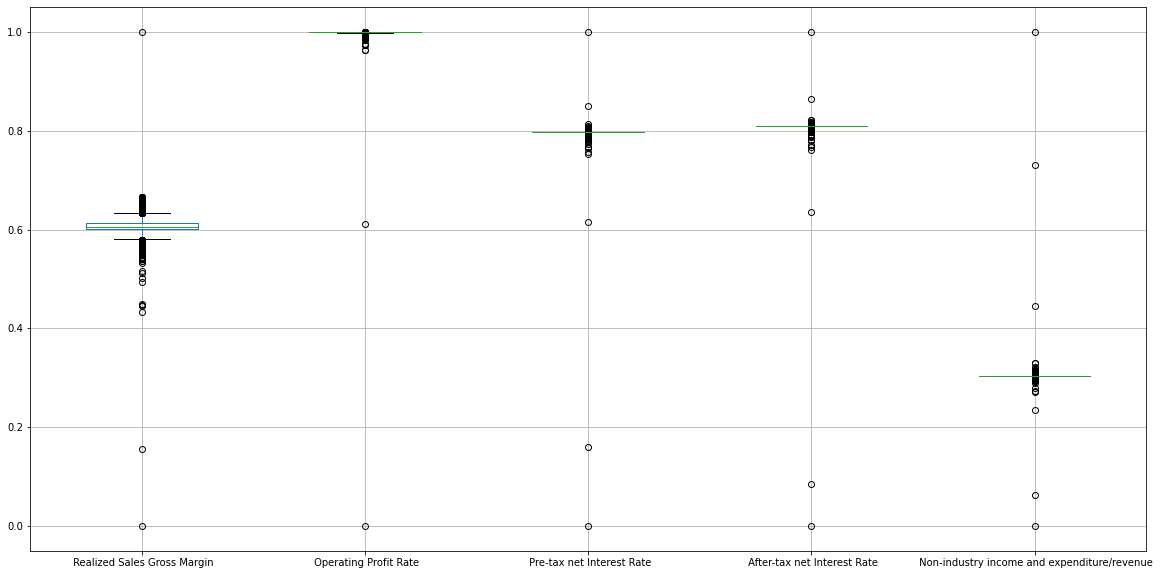

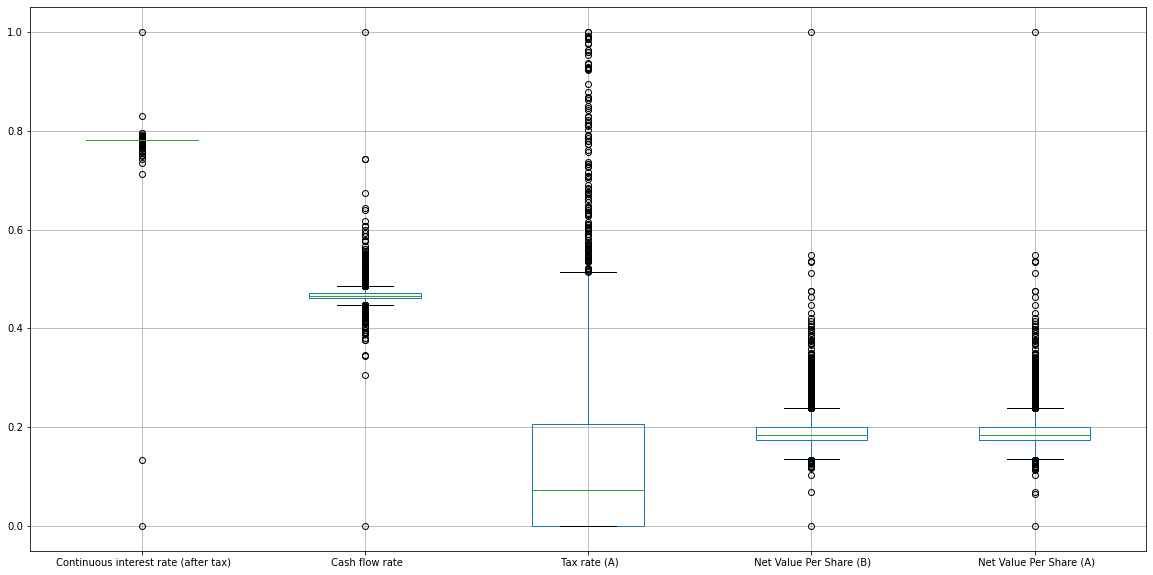

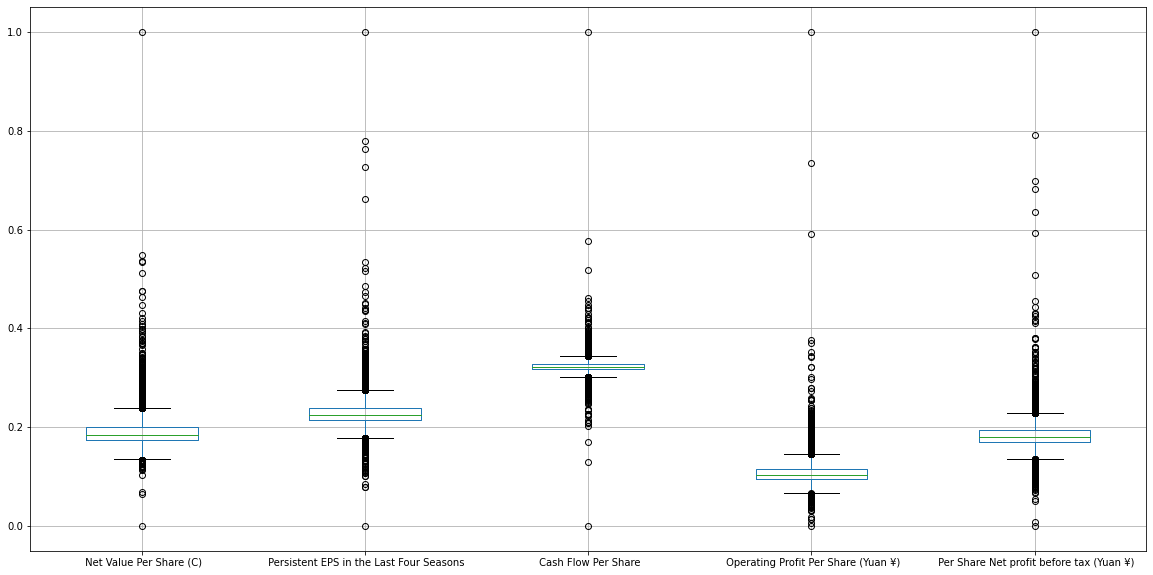

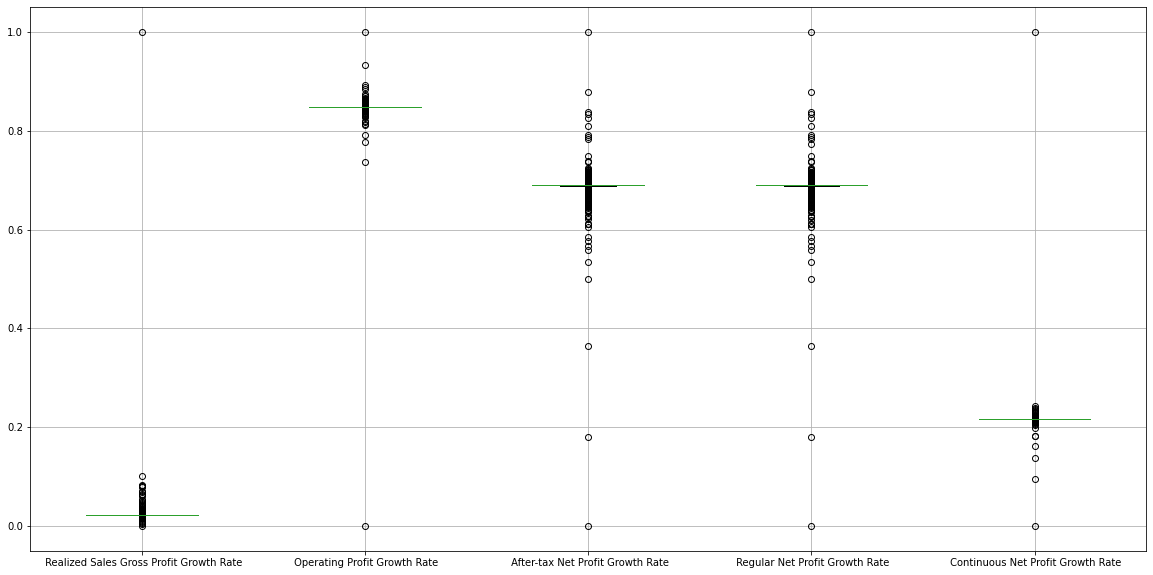

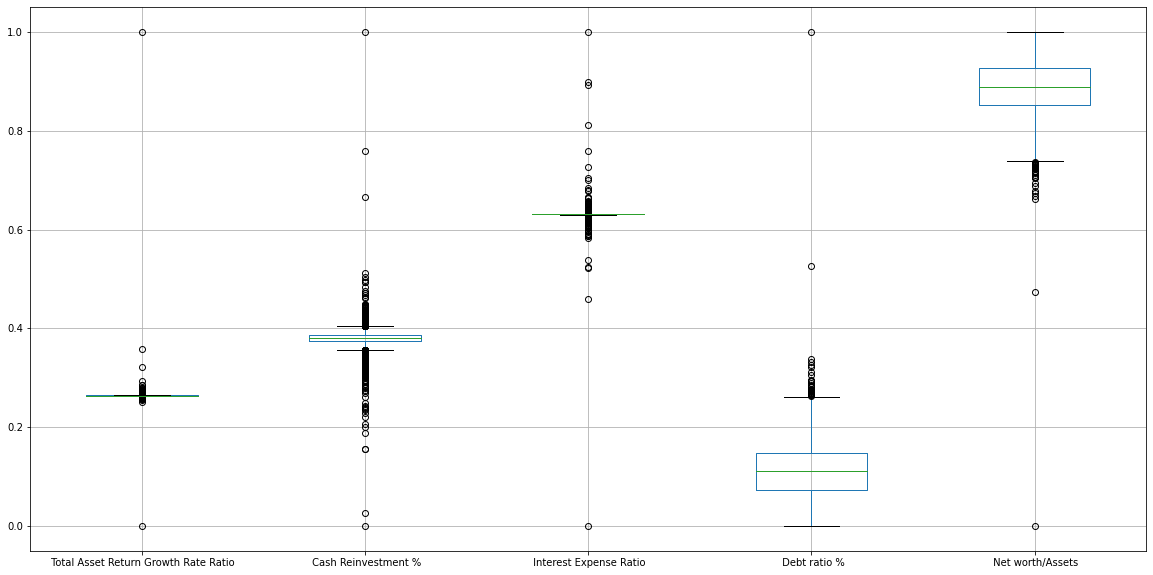

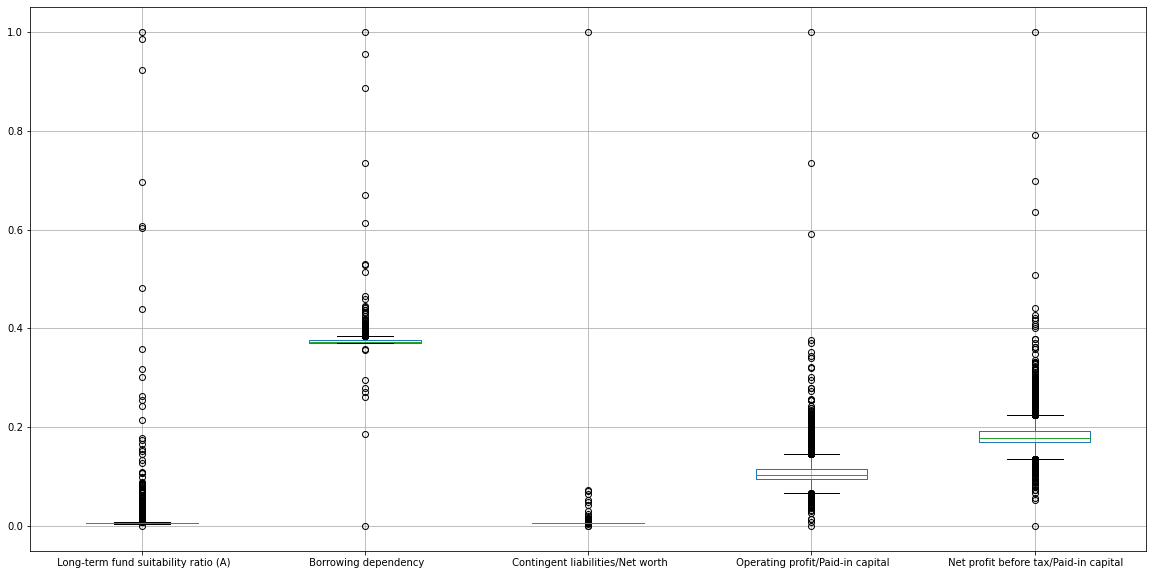

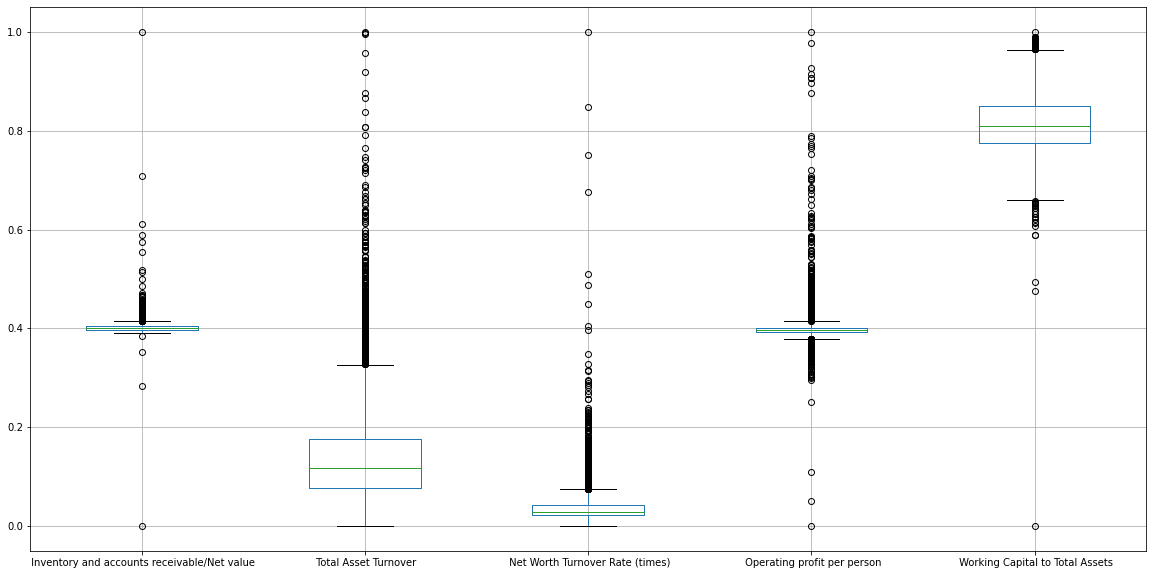

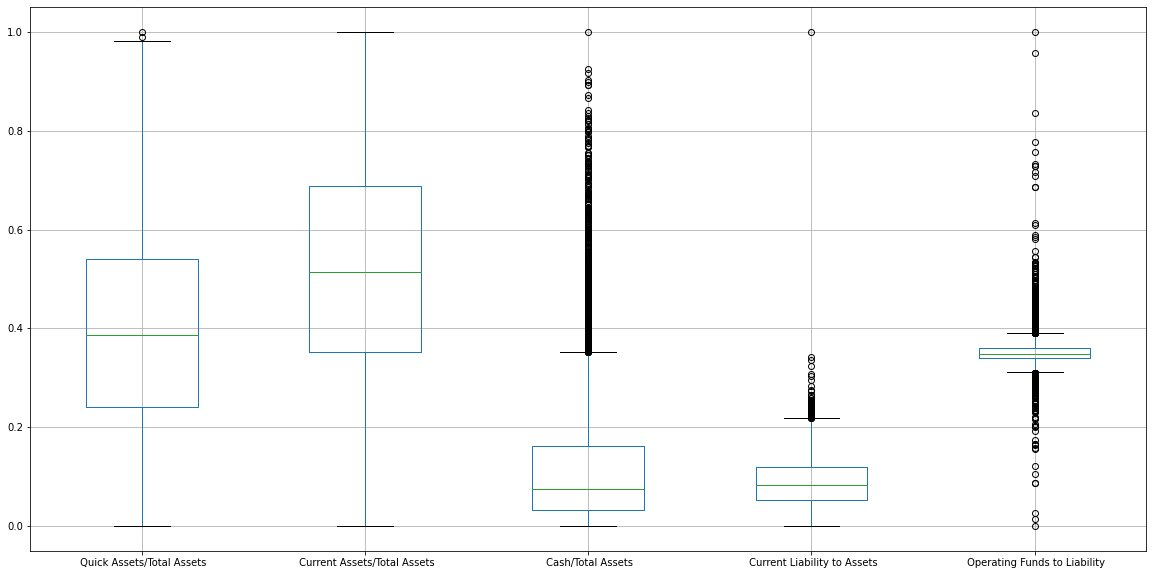

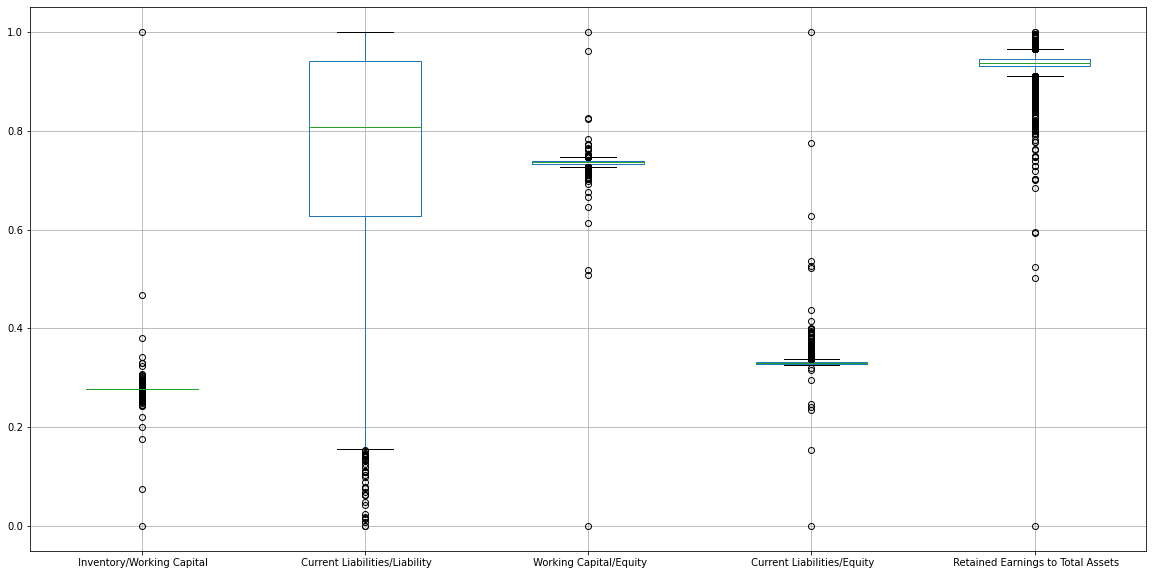

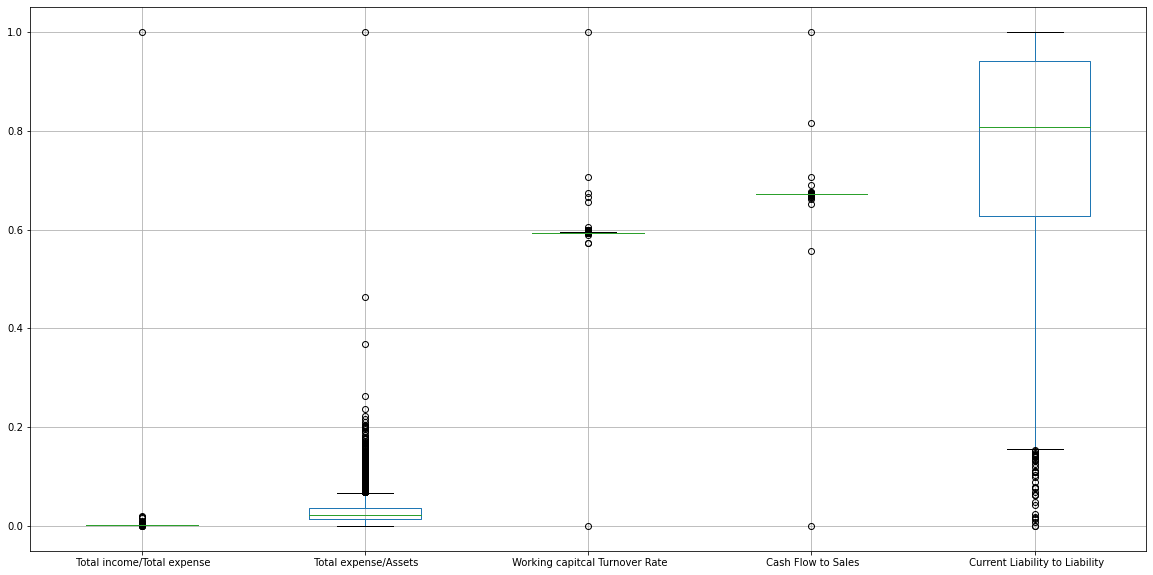

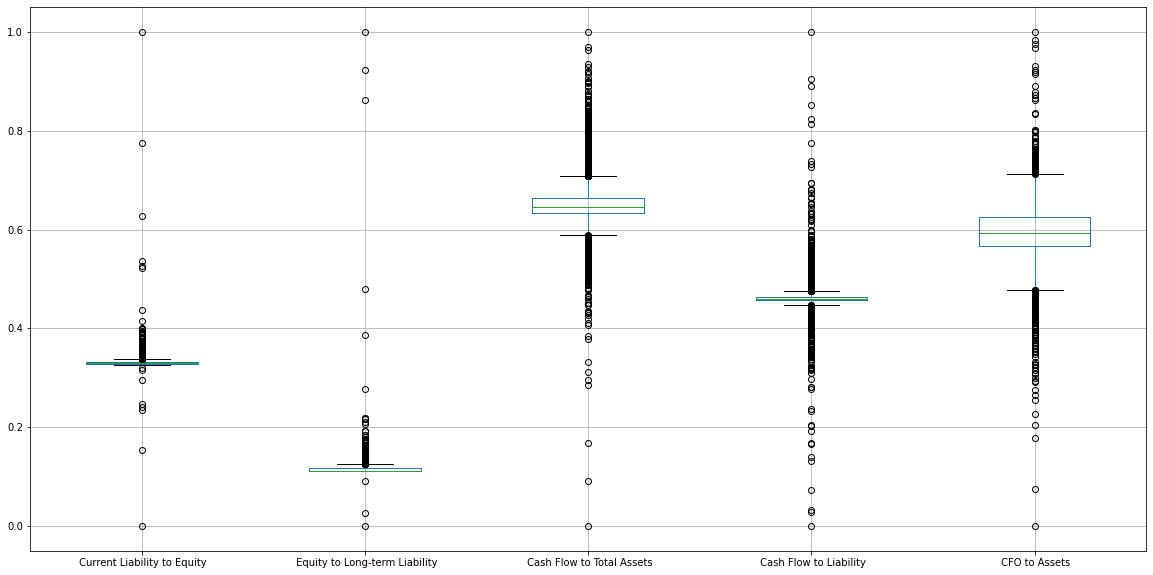

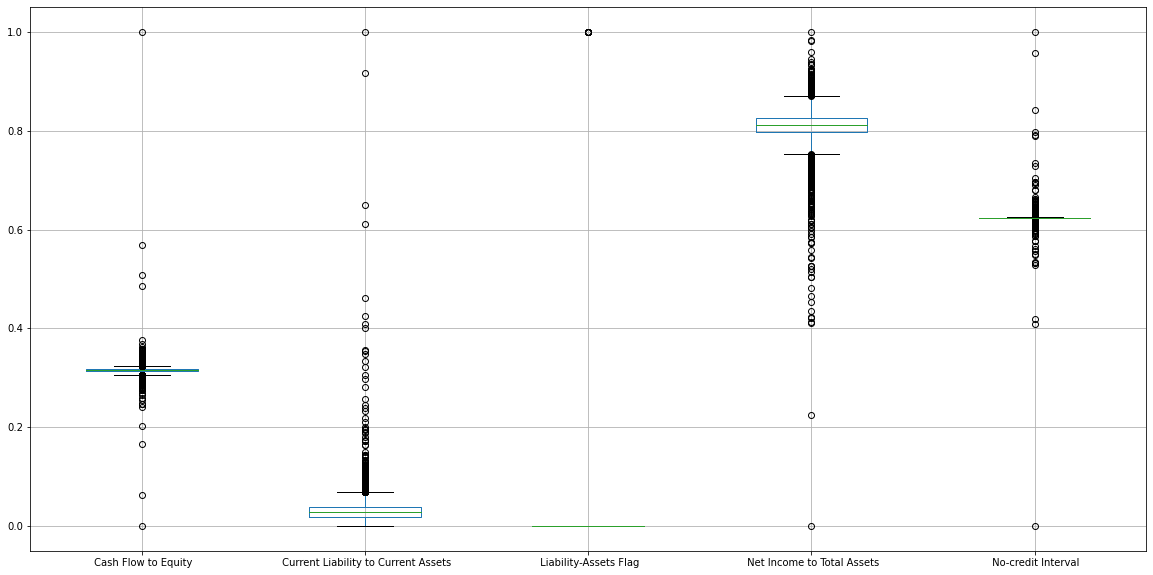

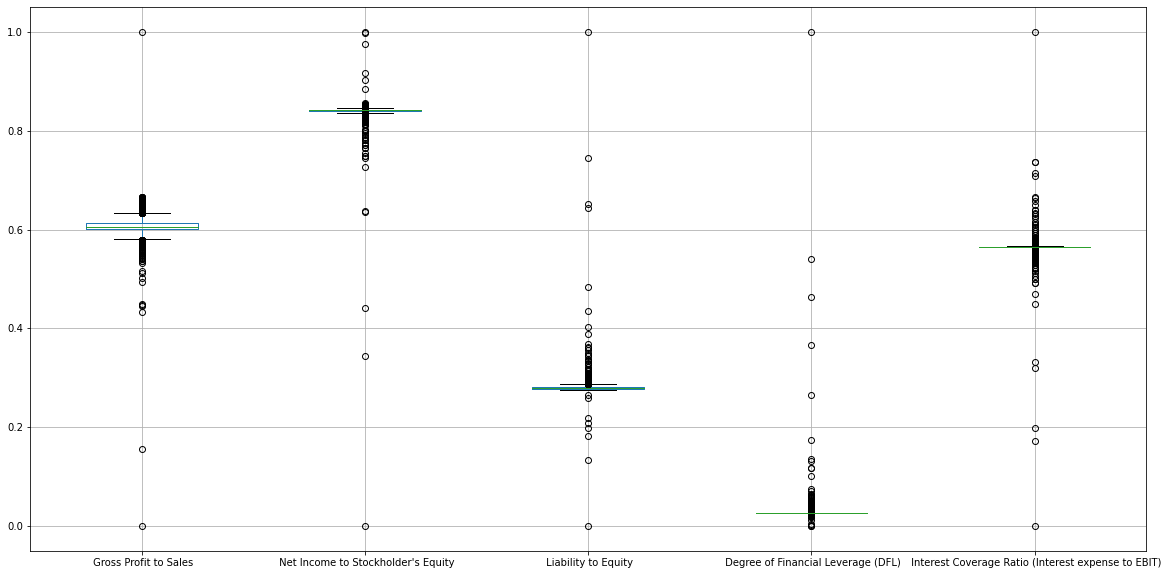

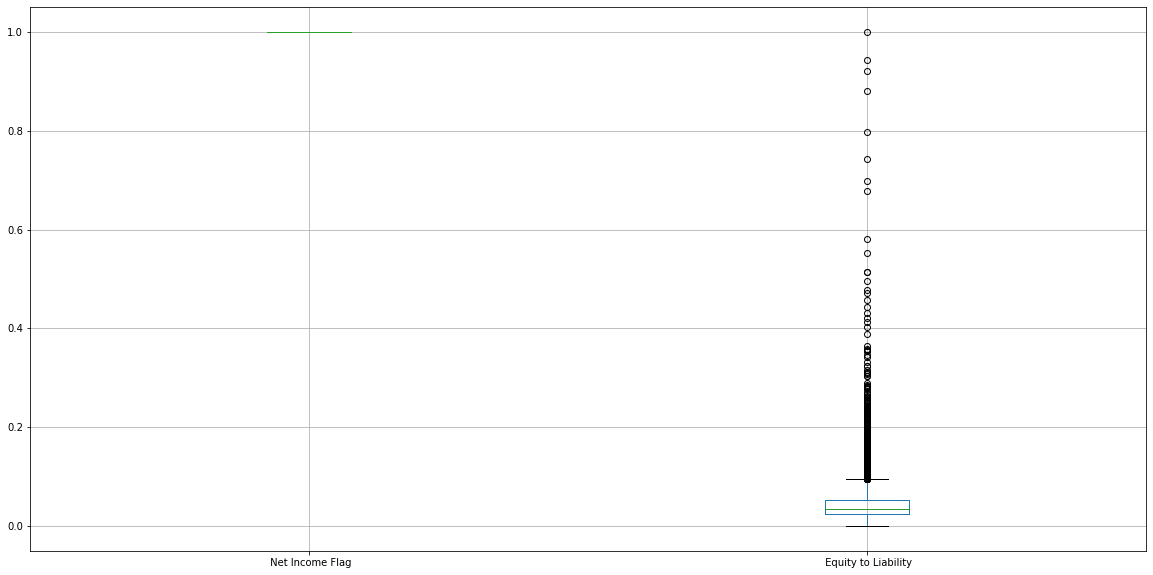

In [7]:
large_columns = data.columns[data.max() > 1000]
small_columns = data.drop(columns=large_columns).columns
for i in range(0, len(large_columns),5):
    plt.figure(figsize=(20,10))
    data[large_columns[i:i+5]].boxplot();

for i in range(0, len(small_columns),5):
    plt.figure(figsize=(20,10))
    data[small_columns[i:i+5]].boxplot();

Looking at the boxplots, there seem to have several columns with outliers. But, for the purpose of predicting a company might file for bankruptcy should we clean the data and remove the outliers? In this exercise, I am not removing the outliers, since I think this data is important for the prediction.

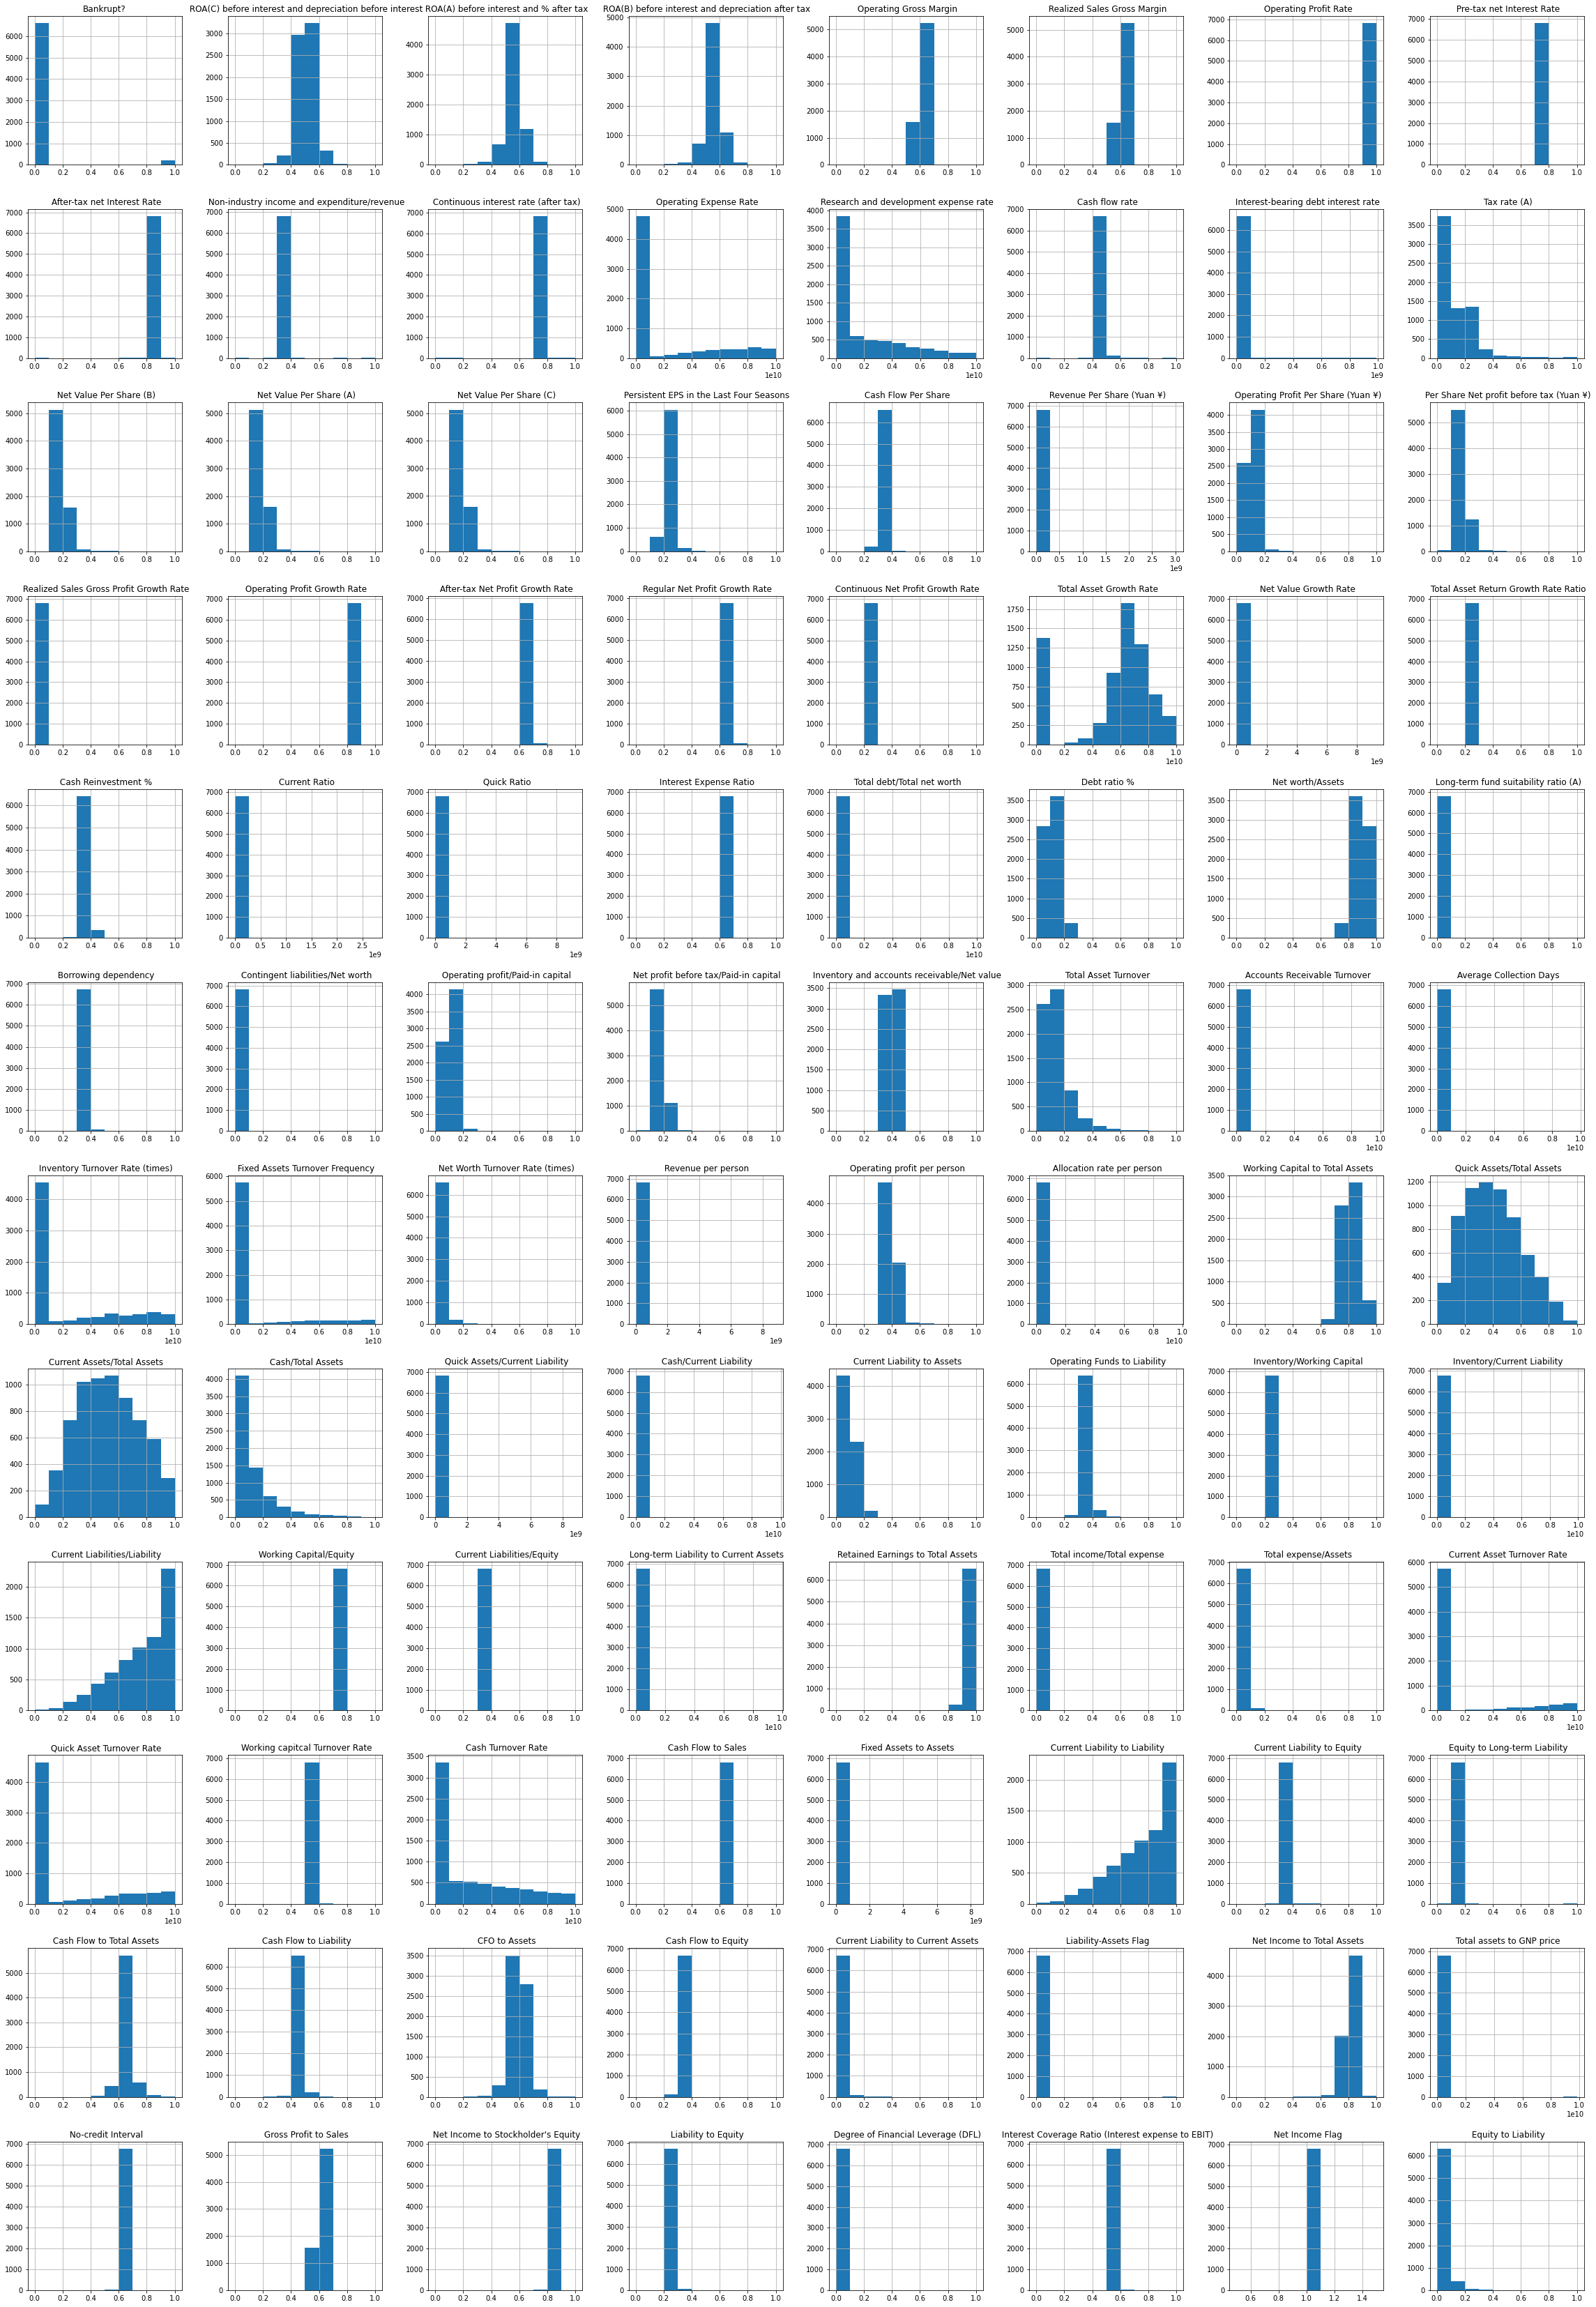

In [8]:
data.hist(figsize=(40,60), layout=(12,8));

This histograms show the several column values are not normally distributed. Again, not sure if this is important for the prediction, but it is clear the data needs to be scaled (which may not affect the distribution).

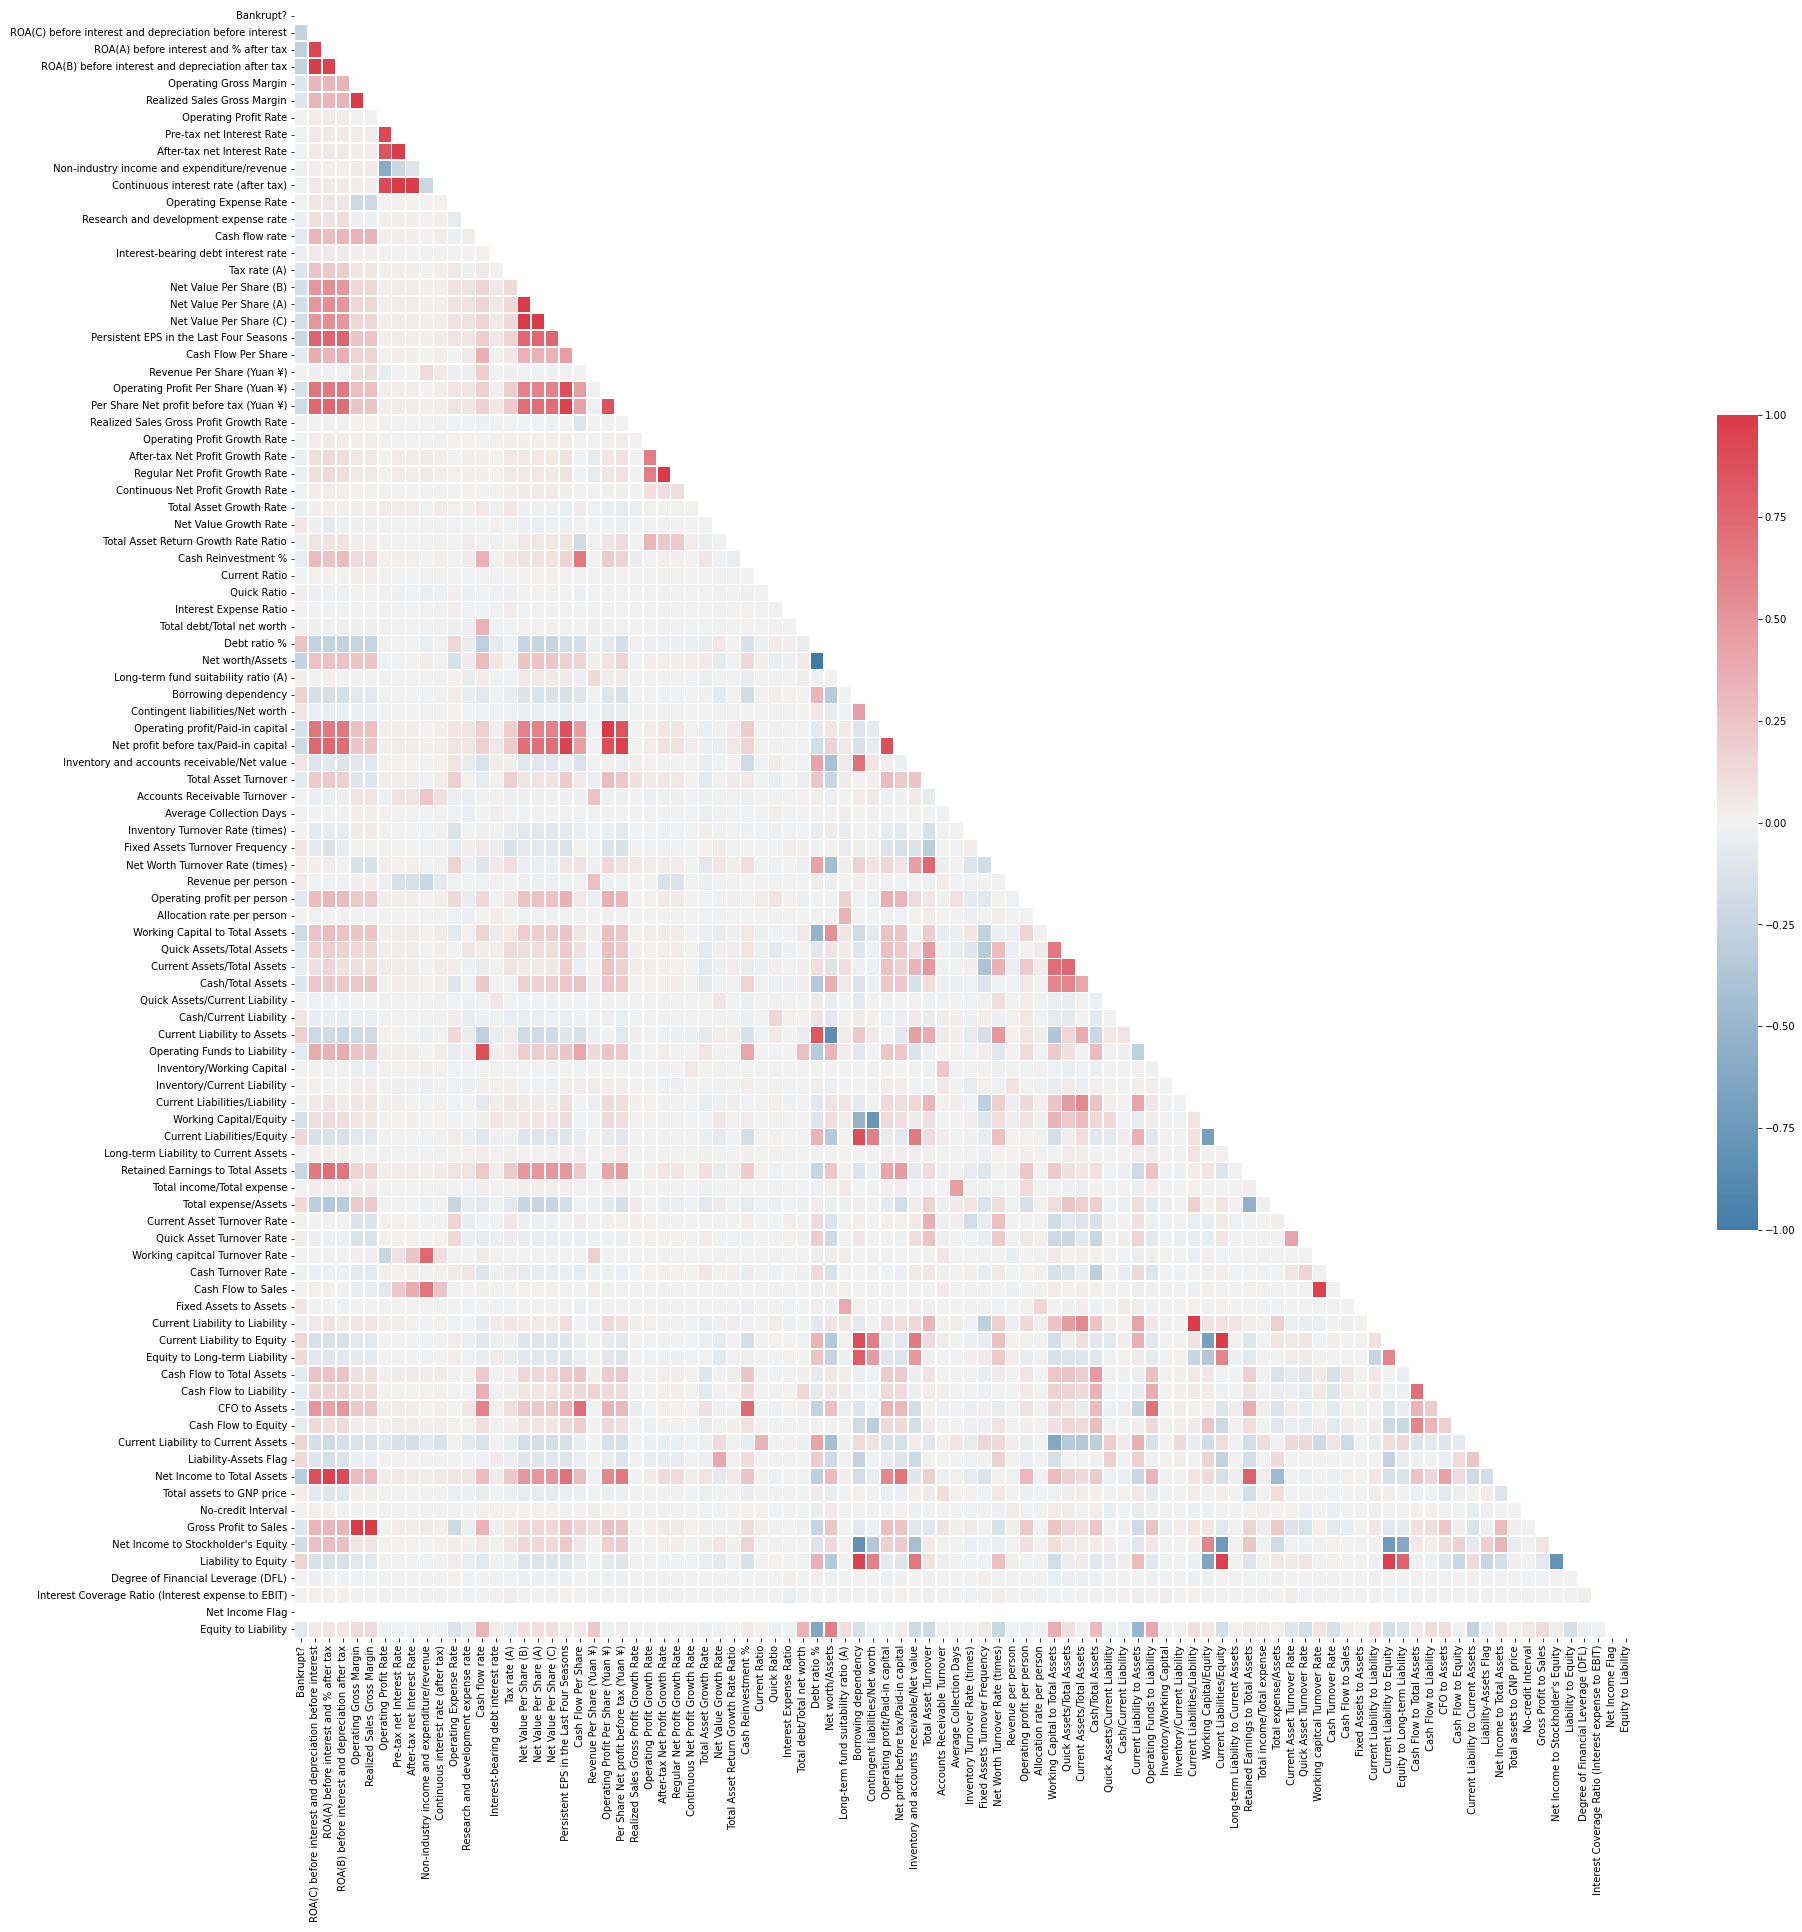

In [9]:
# Correlation matrix that measures the linear relationships
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
plt.figure(figsize=(30,30))
corr = data.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, linewidths=.5, center=0, mask=mask, cmap=sns.diverging_palette(240, 10, as_cmap=True), cbar_kws={'shrink' : .5});

There are some independent variables that are strongly correlated with one another. There seems to have low correlation with the target variable though.

#### Data Pre-processing

All the columns are numeric. No need to be concerned about dealing with categorical data. 

In [10]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

The int types are the target variable (Bankrupt?), and the two flag columns.

It is worth explaining the meaning of the flag columns (extracted from <a href="https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction">Kaggle</a>):
<ul>
    <li><b>Liability-Assets Flag</b>: 1 if Total Liability exceeds Total Assets, 0 otherwise</li>
    <li><b>Net Income Flag</b>: 1 if Net Income is Negative for the last two years, 0 otherwise</li>
</ul>

In [11]:
data_groups = data.columns.to_series().groupby(data.dtypes).groups
for datatype in data_groups:
    print(f'Datatype {datatype}: {data_groups[datatype].to_list()}')

Datatype int64: ['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']
Datatype float64: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit

Separate the independent and target variables, and scale the data

In [12]:
X = data.drop(['Bankrupt?'], axis=1).copy()
y = data['Bankrupt?'].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### Separate the train and the test data

As a side note, I have created a variable ``global_random_state``. This variable it to be used to set the seed and make it possible to reproduce the test.
One interesting aspect of that is the fact I noticed the results are very much sensitive to how the data is splitted.

In [13]:
global_random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=global_random_state)

#### No skill parameters
The no skill is to calculate the probabilities should we decide not to use any model, meaning to try predicting by chance.

In [14]:
# No skill parameters
no_skill = len(y_test[y_test == 1]) / len(y_test)
probs_ns = [0 for _ in range(len(y_test))]
fpr_ns, tpr_ns, _ = roc_curve(y_test, probs_ns)
auc_ns = auc(fpr_ns, tpr_ns)

#### Auxiliary Functions

In [15]:
def evaluate(model=None, X=None, y=None, name=None):
    if model is None or X is None or y is None:
        return
    # Calculate the parameters to assess the model
    y_pred = model.predict(X)
    if hasattr( model, 'decision_function' ) and callable(model.decision_function):
        scores = cross_val_predict(model, X, y, cv=3, method='decision_function')
    elif hasattr( model, 'predict_proba' ) and callable(model.predict_proba):
        scores = cross_val_predict(model, X, y, cv=3, method='predict_proba')
        scores = scores[:, 1] # keep probabilities for the positive outcome only
    else:
        scores = model.predict(X)
        
    precisions, recalls, thresholds = precision_recall_curve(y, scores)
    fpr, tpr, _ = roc_curve(y, scores)
    auc_roc = auc(fpr, tpr)

    # Confusion Matrix
    # The count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
    cm = confusion_matrix(y, y_pred)
    
    tn, fp, fn, tp = np.concatenate(cm).flat
    precision = tp/(tp + fp)
    recall = tp/(tp + fn) 
    specificity = tn/(tn+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    f1 = 2 * precision * recall / (precision + recall)
    result = {  'name': name, 
                'performance_measures': {   'name' : name, 'precision' : precision, 'recall' : recall, 
                                            'specificity' : specificity, 'accuracy' : accuracy, 
                                            'auc' : auc_roc, 'f1_score' : f1},
                'graph' : {'precision' : precisions, 'recall' : recalls, 'tpr' : tpr, 'fpr' : fpr, 'auc' : auc_roc}
    }

    figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axis[0].set_title(f'{name} - Confusion Matrix')
    ConfusionMatrixDisplay(cm).plot(ax=axis[0], colorbar=False);
    axis[1].plot(thresholds, precisions[:-1], linestyle='-', color='b', label='Precision')
    axis[1].plot(thresholds, recalls[:-1], linestyle='-', color='g', label='Recall')
    axis[1].set_title(f'{name} - Precision x Recall')
    axis[1].set_xlabel('Thresholds')
    axis[1].grid(True)
    axis[1].legend();

    return result

#### Logistic Regression Classifier

In [16]:
lr_param = [
    {'penalty' : ['l2', 'none'], 'solver' : ['lbfgs'], 'max_iter' : [1000]},
    {'penalty' : ['l1', 'l2'], 'solver' : ['liblinear'], 'max_iter' : [1000]},
]

lr_model = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_param, cv=10)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.968475073313783

In [17]:
lr_model.best_estimator_

LogisticRegression(max_iter=1000)

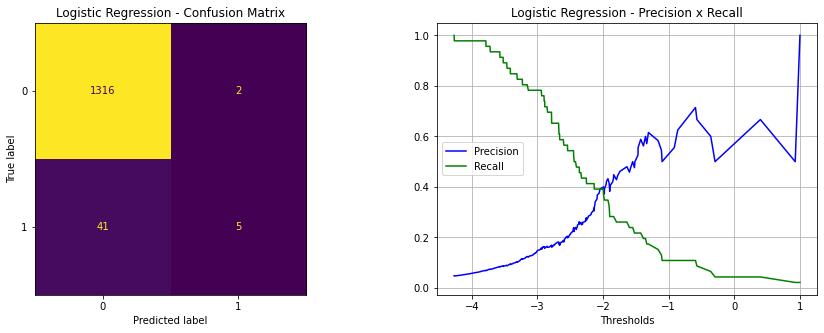

In [18]:
lr_data = evaluate(lr_model.best_estimator_, X_test, y_test, 'Logistic Regression');

#### Support Vector Machine (SVM) Classifier

In [19]:
svm_param = [
    {'kernel' : ['linear', 'rbf', 'sigmoid'], 'max_iter' : [1000]},
]

svm_model = GridSearchCV(estimator=SVC(), param_grid=svm_param, cv=10)
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.967008797653959

In [20]:
svm_model.best_estimator_

SVC(kernel='linear', max_iter=1000)

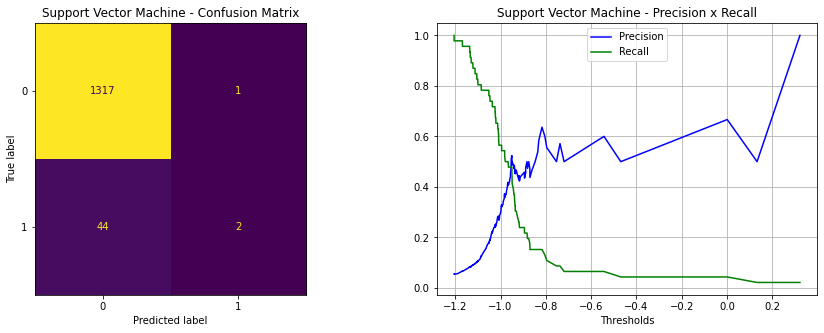

In [21]:
svm_data = evaluate(svm_model.best_estimator_, X_test, y_test, 'Support Vector Machine');

#### Naïve Bayes Classifier

In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)

0.3885630498533724

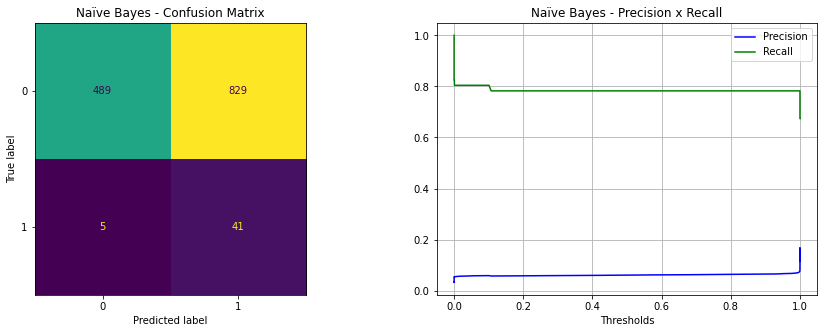

In [23]:
nb_data = evaluate(nb_model, X_test, y_test, 'Naïve Bayes');

#### Random Forest Classifier

In [24]:
rf_param = [
    {'n_estimators' : [10, 30, 50], 'criterion': ['gini', 'entropy'], 'max_depth' : [2, 5, 10], 'max_features' : ['sqrt', 'log2'], 
     'random_state' : [global_random_state]},
]

rf_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param, cv=10)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.966275659824047

In [25]:
rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=30, random_state=0)

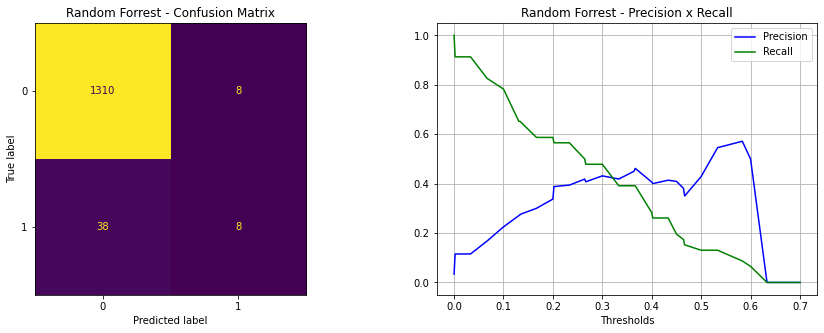

In [26]:
rf_data = evaluate(rf_model.best_estimator_, X_test, y_test, 'Random Forrest')

#### Gradient Boosting Classifier

In [27]:
gb_param = [
    {'n_estimators' : [10, 30, 50], 'criterion': ['friedman_mse', 'squared_error', 'mse'], 'max_depth' : [2, 5, 10], 'max_features' : ['sqrt', 'log2'],
     'random_state' : [global_random_state]},
]

gb_model = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=gb_param, cv=10)
gb_model.fit(X_train, y_train)
gb_model.score(X_test, y_test)

0.9640762463343109

In [28]:
gb_model.best_estimator_

GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=50,
                           random_state=0)

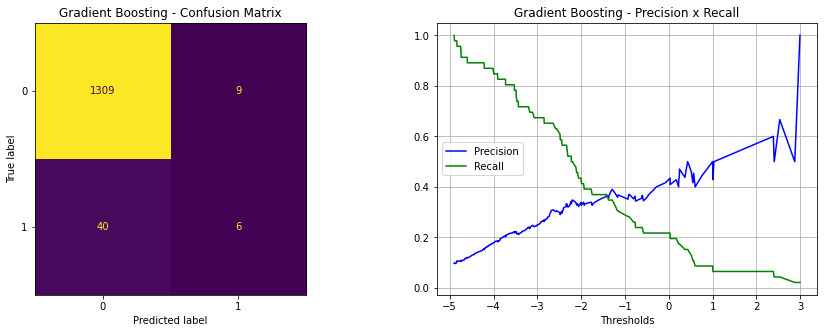

In [29]:
gb_data = evaluate(gb_model.best_estimator_, X_test, y_test, 'Gradient Boosting')

#### Extra Trees Classifier

In [30]:
et_param = [
    {'n_estimators' : [10, 30, 50], 'criterion': ['gini', 'entropy'], 'max_depth' : [2, 5, 10], 'max_features' : ['sqrt', 'log2'],
     'random_state' : [global_random_state]},
]

et_model = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=et_param, cv=10)
et_model.fit(X_train, y_train)
et_model.score(X_test, y_test)

0.967741935483871

In [31]:
et_model.best_estimator_

ExtraTreesClassifier(max_depth=10, max_features='log2', n_estimators=30,
                     random_state=0)

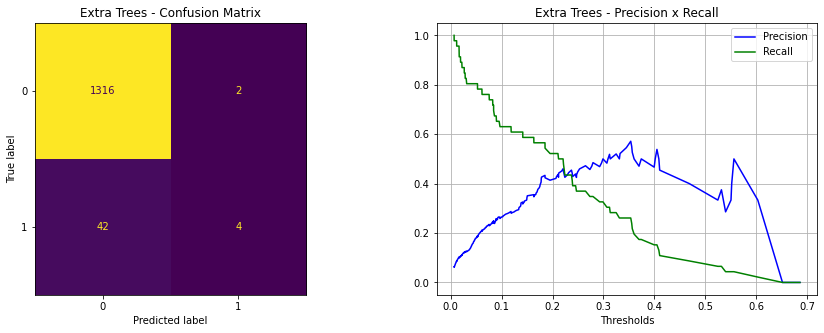

In [32]:
et_data = evaluate(et_model.best_estimator_, X_test, y_test, 'Extra Trees')

#### XGBoost Classifier

In [33]:
xgb_param = [
    {'n_estimators': [10, 30, 50], 'tree_method' : ['hist', 'exact', 'approx'], 'max_depth' : [2, 5, 10],
    'eval_metric' : ['error', 'logloss', 'rmse'], 'random_state' : [global_random_state]},
]

xgb_model = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_param, cv=10)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.967741935483871

In [34]:
xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

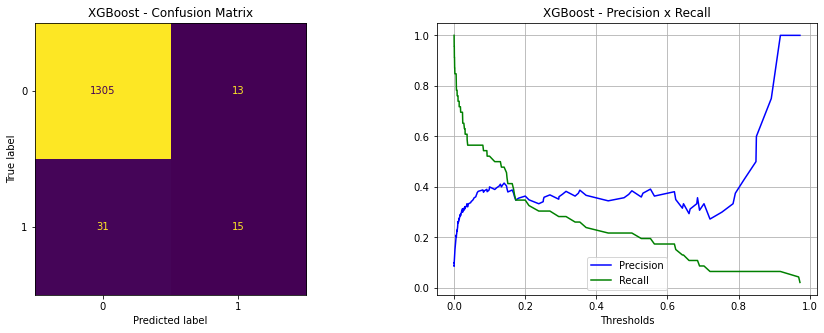

In [35]:
xgb_data = evaluate(xgb_model.best_estimator_, X_test, y_test, 'XGBoost')

#### Final Comparison Between the Models

In [36]:
results = [lr_data['performance_measures'], svm_data['performance_measures'], nb_data['performance_measures'],
           rf_data['performance_measures'], gb_data['performance_measures'], et_data['performance_measures'],
           xgb_data['performance_measures']]
df_results = pd.DataFrame(results)
df_results.set_index('name', inplace=True)
df_results

,precision,recall,specificity,accuracy,auc,f1_score
name,,,,,,
Logistic Regression,0.714286,0.108696,0.998483,0.968475,0.885614,0.188679
Support Vector Machine,0.666667,0.043478,0.999241,0.967009,0.902141,0.081633
Naïve Bayes,0.047126,0.891304,0.371017,0.388563,0.766164,0.089520
Random Forrest,0.500000,0.173913,0.993930,0.966276,0.901720,0.258065
Gradient Boosting,0.400000,0.130435,0.993171,0.964076,0.930643,0.196721
Extra Trees,0.666667,0.086957,0.998483,0.967742,0.919311,0.153846
XGBoost,0.535714,0.326087,0.990137,0.967742,0.931929,0.405405


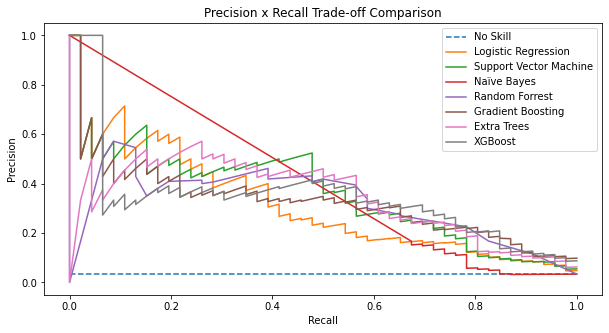

In [37]:
models = [lr_data, svm_data, nb_data, rf_data, gb_data, et_data, xgb_data]
plt.figure(figsize=(10,5))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

for model in models:
    plt.plot(model['graph']['recall'], model['graph']['precision'], linestyle='-', label=model['name'])    

plt.title('Precision x Recall Trade-off Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();


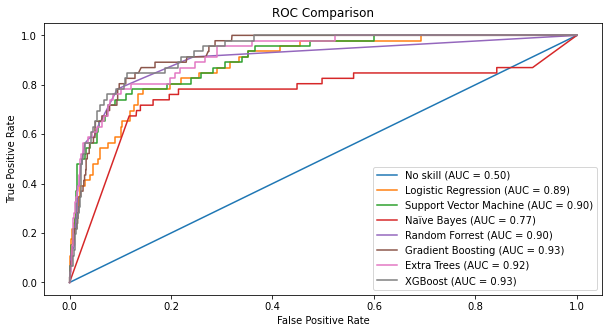

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(fpr_ns, tpr_ns, label=f'No skill (AUC = {auc_ns:0.2f})')
for model in models:
    ax.plot(model['graph']['fpr'], model['graph']['tpr'], label=f'{model["name"]} (AUC = {model["graph"]["auc"]:0.2f})')    

ax.set_title('ROC Comparison')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

## Conclusion

This time we introduced tree-based models. For this exercise, in general, tree models are superior in results as compared to the preivous methods. The highes F1 Score was achieved by XGBoost. Random Forrest and Gradient Boosting produced good results as well. 

As we know now, these models are very sensitive to the train data. After running a few times, with different seeds (random_state), it seems XGBoost is the best by far.

Overall, <b>XGBoost</b> seems to be the best model.

One point to add: the models are very sensitive to the split data used. Depending on how the data is splitted, the outcome can vary a lot. I used a seed equal to zero (``global_random_state = 0``) as part of this exercise, but using different seeds (e.g. 39, 42) may bring a complete different result. 